In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.kernel_ridge import KernelRidge

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Add dimension

In [19]:
x = np.array([[0,1],
            [1,0],
            [2,4], 
            [4,2],
            [0,-1],
            [-1,0],
            [-2,-4],
            [-4,-2]])
y = np. array([1, 1, 0, 0, 1, 1, 0, 0])

def map_feature(x):
    #x, x2 , (x1^2 +x2^2)
    new = np.array((x[:,0], x[:,1], x[:,0]**2 + x[:,1]**2)).T
    return new
z = map_feature(x)
z

array([[ 0,  1,  1],
       [ 1,  0,  1],
       [ 2,  4, 20],
       [ 4,  2, 20],
       [ 0, -1,  1],
       [-1,  0,  1],
       [-2, -4, 20],
       [-4, -2, 20]])

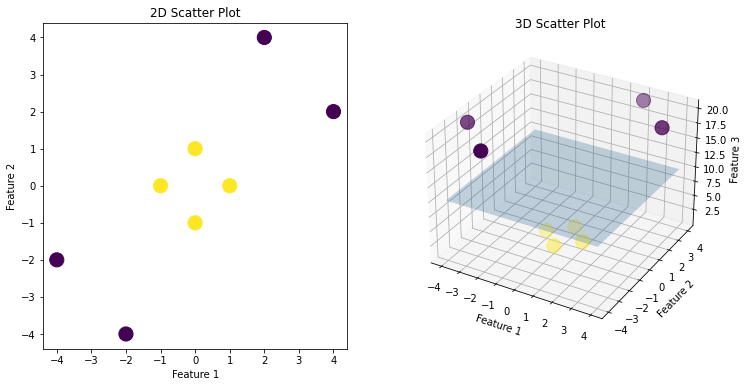

In [22]:
fig = plt.figure(figsize=(12, 6))

# Create the 2D scatter plot on the first subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x[:, 0], x[:, 1], c=y, cmap="viridis", s=200)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('2D Scatter Plot')

# Create the 3D scatter plot on the second subplot
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter(z[:, 0], z[:, 1], z[:, 2], c=y, cmap="viridis", s=200)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.set_title('3D Scatter Plot')

# hyperplanes
xx = np.linspace(-4, 4, 10)
yy = np.linspace(-4, 4, 10)
X, Y = np.meshgrid(xx, yy)
Z = np.zeros((10,10)) + 10

ax2.plot_surface(X, Y, Z, alpha=0.25)

plt.show()


### Compare fit x vs z


In [24]:
from sklearn import linear_model

In [25]:
clf = linear_model.RidgeClassifier()
clf.fit(x, y)

y_pred = clf.predict(x)

acu = metrics.accuracy_score(y, y_pred)
acu

0.5

In [26]:
clf = linear_model.RidgeClassifier()
clf.fit(z, y)

y_pred = clf.predict(z)

acu = metrics.accuracy_score(y, y_pred)
acu

1.0

### Linear kernel

In [28]:
x

array([[ 0,  1],
       [ 1,  0],
       [ 2,  4],
       [ 4,  2],
       [ 0, -1],
       [-1,  0],
       [-2, -4],
       [-4, -2]])

In [31]:
k = metrics.pairwise.linear_kernel(x)
k

array([[  1.,   0.,   4.,   2.,  -1.,   0.,  -4.,  -2.],
       [  0.,   1.,   2.,   4.,   0.,  -1.,  -2.,  -4.],
       [  4.,   2.,  20.,  16.,  -4.,  -2., -20., -16.],
       [  2.,   4.,  16.,  20.,  -2.,  -4., -16., -20.],
       [ -1.,   0.,  -4.,  -2.,   1.,   0.,   4.,   2.],
       [  0.,  -1.,  -2.,  -4.,   0.,   1.,   2.,   4.],
       [ -4.,  -2., -20., -16.,   4.,   2.,  20.,  16.],
       [ -2.,  -4., -16., -20.,   2.,   4.,  16.,  20.]])

In [32]:
np.dot(x, x.T)


array([[  1,   0,   4,   2,  -1,   0,  -4,  -2],
       [  0,   1,   2,   4,   0,  -1,  -2,  -4],
       [  4,   2,  20,  16,  -4,  -2, -20, -16],
       [  2,   4,  16,  20,  -2,  -4, -16, -20],
       [ -1,   0,  -4,  -2,   1,   0,   4,   2],
       [  0,  -1,  -2,  -4,   0,   1,   2,   4],
       [ -4,  -2, -20, -16,   4,   2,  20,  16],
       [ -2,  -4, -16, -20,   2,   4,  16,  20]])

### Polinomial kernel


In [37]:
d, coef0, gamma = 2, 1, 1.0/x.shape[1]

k = ((gamma*np.dot(x, x.T)) + coef0)**d

print("k (calc):\n", k)

k (calc):
 [[  2.25   1.     9.     4.     0.25   1.     1.     0.  ]
 [  1.     2.25   4.     9.     1.     0.25   0.     1.  ]
 [  9.     4.   121.    81.     1.     0.    81.    49.  ]
 [  4.     9.    81.   121.     0.     1.    49.    81.  ]
 [  0.25   1.     1.     0.     2.25   1.     9.     4.  ]
 [  1.     0.25   0.     1.     1.     2.25   4.     9.  ]
 [  1.     0.    81.    49.     9.     4.   121.    81.  ]
 [  0.     1.    49.    81.     4.     9.    81.   121.  ]]


In [38]:
sk = metrics.pairwise.polynomial_kernel(x, degree=d, coef0=coef0, gamma=gamma)
sk

array([[  2.25,   1.  ,   9.  ,   4.  ,   0.25,   1.  ,   1.  ,   0.  ],
       [  1.  ,   2.25,   4.  ,   9.  ,   1.  ,   0.25,   0.  ,   1.  ],
       [  9.  ,   4.  , 121.  ,  81.  ,   1.  ,   0.  ,  81.  ,  49.  ],
       [  4.  ,   9.  ,  81.  , 121.  ,   0.  ,   1.  ,  49.  ,  81.  ],
       [  0.25,   1.  ,   1.  ,   0.  ,   2.25,   1.  ,   9.  ,   4.  ],
       [  1.  ,   0.25,   0.  ,   1.  ,   1.  ,   2.25,   4.  ,   9.  ],
       [  1.  ,   0.  ,  81.  ,  49.  ,   9.  ,   4.  , 121.  ,  81.  ],
       [  0.  ,   1.  ,  49.  ,  81.  ,   4.  ,   9.  ,  81.  , 121.  ]])

In [39]:
sum(k-sk)

array([0., 0., 0., 0., 0., 0., 0., 0.])

### RBG kernel

In [42]:
gamma = 1.0/x.shape[1]

k = np.exp(-gamma * np.sum((x - x[:, np.newaxis])**2, axis=-1)).round(3)
k


array([[1.   , 0.368, 0.002, 0.   , 0.135, 0.368, 0.   , 0.   ],
       [0.368, 1.   , 0.   , 0.002, 0.368, 0.135, 0.   , 0.   ],
       [0.002, 0.   , 1.   , 0.018, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.002, 0.018, 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.135, 0.368, 0.   , 0.   , 1.   , 0.368, 0.002, 0.   ],
       [0.368, 0.135, 0.   , 0.   , 0.368, 1.   , 0.   , 0.002],
       [0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 1.   , 0.018],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.018, 1.   ]])

In [47]:
np.set_printoptions(suppress=True)
sk = metrics.pairwise.rbf_kernel(x , gamma=gamma).round(3)
sk

array([[1.   , 0.368, 0.002, 0.   , 0.135, 0.368, 0.   , 0.   ],
       [0.368, 1.   , 0.   , 0.002, 0.368, 0.135, 0.   , 0.   ],
       [0.002, 0.   , 1.   , 0.018, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.002, 0.018, 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.135, 0.368, 0.   , 0.   , 1.   , 0.368, 0.002, 0.   ],
       [0.368, 0.135, 0.   , 0.   , 0.368, 1.   , 0.   , 0.002],
       [0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 1.   , 0.018],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.018, 1.   ]])

In [48]:
sum(k-sk)

array([0., 0., 0., 0., 0., 0., 0., 0.])

## Sigmoid kernel

In [49]:
coef0, gamma = 1, 1.0/x.shape[1]
k = np.tanh(gamma * np.dot(x, x.T) + coef0).round(3)
k

array([[ 0.905,  0.762,  0.995,  0.964,  0.462,  0.762, -0.762,  0.   ],
       [ 0.762,  0.905,  0.964,  0.995,  0.762,  0.462,  0.   , -0.762],
       [ 0.995,  0.964,  1.   ,  1.   , -0.762,  0.   , -1.   , -1.   ],
       [ 0.964,  0.995,  1.   ,  1.   ,  0.   , -0.762, -1.   , -1.   ],
       [ 0.462,  0.762, -0.762,  0.   ,  0.905,  0.762,  0.995,  0.964],
       [ 0.762,  0.462,  0.   , -0.762,  0.762,  0.905,  0.964,  0.995],
       [-0.762,  0.   , -1.   , -1.   ,  0.995,  0.964,  1.   ,  1.   ],
       [ 0.   , -0.762, -1.   , -1.   ,  0.964,  0.995,  1.   ,  1.   ]])

In [50]:
sk = metrics.pairwise.sigmoid_kernel(x, gamma=gamma).round(3)
sk

array([[ 0.905,  0.762,  0.995,  0.964,  0.462,  0.762, -0.762,  0.   ],
       [ 0.762,  0.905,  0.964,  0.995,  0.762,  0.462,  0.   , -0.762],
       [ 0.995,  0.964,  1.   ,  1.   , -0.762,  0.   , -1.   , -1.   ],
       [ 0.964,  0.995,  1.   ,  1.   ,  0.   , -0.762, -1.   , -1.   ],
       [ 0.462,  0.762, -0.762,  0.   ,  0.905,  0.762,  0.995,  0.964],
       [ 0.762,  0.462,  0.   , -0.762,  0.762,  0.905,  0.964,  0.995],
       [-0.762,  0.   , -1.   , -1.   ,  0.995,  0.964,  1.   ,  1.   ],
       [ 0.   , -0.762, -1.   , -1.   ,  0.964,  0.995,  1.   ,  1.   ]])

In [51]:
sum(k-sk)

array([0., 0., 0., 0., 0., 0., 0., 0.])

### Custom

In [53]:
def custom_kernel(x):
    return np.dot(x, x.T)
k = custom_kernel(x)
k

array([[  1,   0,   4,   2,  -1,   0,  -4,  -2],
       [  0,   1,   2,   4,   0,  -1,  -2,  -4],
       [  4,   2,  20,  16,  -4,  -2, -20, -16],
       [  2,   4,  16,  20,  -2,  -4, -16, -20],
       [ -1,   0,  -4,  -2,   1,   0,   4,   2],
       [  0,  -1,  -2,  -4,   0,   1,   2,   4],
       [ -4,  -2, -20, -16,   4,   2,  20,  16],
       [ -2,  -4, -16, -20,   2,   4,  16,  20]])

In [55]:
sk = metrics.pairwise.linear_kernel(x)
sk

array([[  1.,   0.,   4.,   2.,  -1.,   0.,  -4.,  -2.],
       [  0.,   1.,   2.,   4.,   0.,  -1.,  -2.,  -4.],
       [  4.,   2.,  20.,  16.,  -4.,  -2., -20., -16.],
       [  2.,   4.,  16.,  20.,  -2.,  -4., -16., -20.],
       [ -1.,   0.,  -4.,  -2.,   1.,   0.,   4.,   2.],
       [  0.,  -1.,  -2.,  -4.,   0.,   1.,   2.,   4.],
       [ -4.,  -2., -20., -16.,   4.,   2.,  20.,  16.],
       [ -2.,  -4., -16., -20.,   2.,   4.,  16.,  20.]])

### Fit: Ridge classifier

In [ ]:
clf = linear_model.RidgeClassifier()
clf.fit(x,y)

y_pred = clf.predict(x)

acu = metrics.accuracy_score(y, y_pred)

In [58]:
k = metrics.pairwise.rbf_kernel(x)
clf = linear_model.RidgeClassifier()
clf.fit(k,y)

y_pred = clf.predict(k)

acu = metrics.accuracy_score(y, y_pred)
acu

1.0

### Fit: Kernel Regression

In [60]:
data = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

In [61]:
reg = KernelRidge()
reg.fit(x_train, y_train)

KernelRidge()

In [64]:
y_pred = reg.predict(x_test)
mse = metrics.mean_squared_error(y_test, y_pred)
mse

25.53591460463911

### kernel = precomputed

In [75]:
data = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.5)

print(x_train.shape, x_test.shape)

(253, 13) (253, 13)


In [76]:
k_train = metrics.pairwise.rbf_kernel(x_train)
k_test = metrics.pairwise.rbf_kernel(x_train)

In [77]:
print(k_train.shape, k_test.shape)

(253, 253) (253, 253)


In [78]:
reg = KernelRidge(kernel="precomputed")
reg.fit(k_train, y_train)

KernelRidge(kernel='precomputed')

In [80]:
y_pred = reg.predict(k_test)
mse = metrics.mean_squared_error(y_test, y_pred)
mse

225.35305618049804